# TP4 - Generative Classifiers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
%matplotlib inline

## 1

Numa tarefa de classificação de duas classes e duas dimensões, os vetores de features são gerados por duas distribuições normais com a mesma matriz de covariância: $\begin{bmatrix}1.1 & 0.3 \\0.3&1.9 \end{bmatrix}$ e os vetores de média são $\mu_1 = \begin{bmatrix}0&0 \end{bmatrix}^t$ e $\mu_2 = \begin{bmatrix}3&3 \end{bmatrix}^t$, respetivamente. Classifique o vetor $\begin{bmatrix}1.0&2.2 \end{bmatrix}^t$ de acordo com o classificador de Bayes, assumindo priors iguais.

$$ P(X|C_1) \to \mathcal{N}(\mu_1,\Sigma) \\ P(X|C_2) \to \mathcal{N}(\mu_2,\Sigma) $$

Priors iguais implica $P(C_1)=P(C_2)=0.5$

Neste caso, em que temos apenas duas classes, o vetor será classificado na classe $C_1$, se:

$$ P(C_1|X)>P(C_2|X) $$

em que cada uma destas probabilidades condicionadas na última equação é dada por:

$$ P(C_j|X) = \frac{P(X|C_j)P(C_j)}{P(X)}, \qquad P(X) = \sum_{j=1}^{2}P(X_{test}|C_j)P(C_j) $$

In [ ]:
mean_1 = np.array([0, 0]).T                                   # média da primeira distribuição normal
mean_2 = np.array([3,3]).T                                    # média da segunda distribuição normal
x = np.array([1.0,2.2]).T                                     # vetor a classificar
covar = np.array([[1.1, 0.3], [0.3, 1.9]])                    # matriz de covariância
pc1 = pc2 = .5                                                # priors

px_by_c1 = multivariate_normal.pdf(x,mean=mean_1,cov=covar)   # likelihood da classe C_1
px_by_c2 = multivariate_normal.pdf(x,mean=mean_2,cov=covar)   # likelihood da classe C_2

px = px_by_c1*pc1 + px_by_c2*pc2                              # evidência

pc1_by_x = px_by_c1*pc1/px                                    # posterior C_1
pc2_by_x = px_by_c2*pc2/px                                    # posterior C_2

if pc1_by_x > pc2_by_x:
    print('Pertence à classe C1')
else:
    print('Pertence à classe C2')


Pertence à classe C1


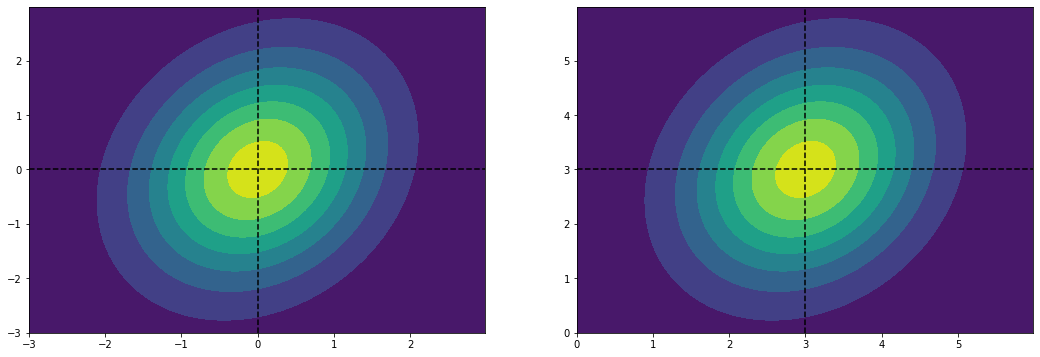

In [ ]:
xx1,yy1 = np.mgrid[-3:3:.01, -3:3:.01]
pos1 = np.dstack((xx1,yy1))
rv1 = multivariate_normal(mean_1, covar)

xx2,yy2 = np.mgrid[0:6:.01, 0:6:.01]
pos2 = np.dstack((xx2,yy2))
rv2 = multivariate_normal(mean_2, covar)

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.contourf(xx1,yy1,rv1.pdf(pos1))
plt.axvline(x=0,ls='--',c='k')
plt.axhline(y=0,ls='--',c='k')

plt.subplot(122)
plt.contourf(xx2,yy2,rv2.pdf(pos2))
plt.axvline(x=3,ls='--',c='k')
plt.axhline(y=3,ls='--',c='k');

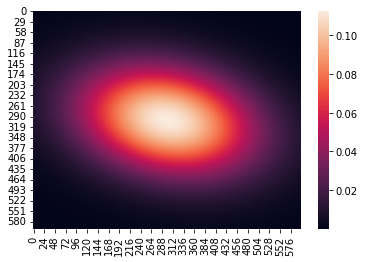

In [ ]:
import seaborn as sb

sb.heatmap(rv1.pdf(pos1));

## 2

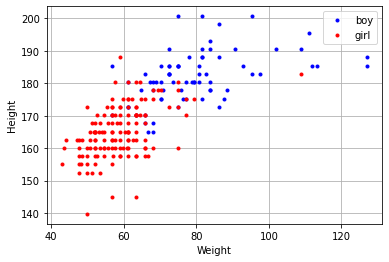

In [ ]:
dataframe = np.loadtxt('heightWeightData.txt',dtype=float,delimiter=',')
gender = dataframe[:,0]
height = dataframe[:,1]
weight = dataframe[:,2]
plt.plot(weight[gender==1],height[gender==1],'b.',label='boy')
plt.plot(weight[gender==2],height[gender==2],'r.',label='girl')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid()
plt.legend();

## a)

In [ ]:
def model_gender(x_train,x_test):
    x_teste = np.array(x_test).T
    gender = x_train[:,0]
    height = x_train[:,1]
    weight = x_train[:,2]

    # cálculo dos vetores com as médias de altura e peso
    u_boys = np.array([np.mean(height[gender==1]),np.mean(weight[gender==1])],dtype=float)
    u_girls = np.array([np.mean(height[gender==2]),np.mean(weight[gender==2])],dtype=float)

    # cálculo das matrizes de covariância
    cov_boys = np.cov([height[gender==1],weight[gender==1]])
    cov_girls = np.cov(height[gender==2],weight[gender==2])

    # cálculo dos priors
    p_boy = len(height[gender==1])/len(height)
    p_girl = len(height[gender==2])/len(height)

    # cálculo das likelihoods
    pxtrain_by_boy = multivariate_normal.pdf(x_teste,mean=u_boys,cov=cov_boys)
    pxtrain_by_girl = multivariate_normal.pdf(x_teste,mean=u_girls,cov=cov_girls)

    # cálculo da evidência
    pxtrain = p_boy*pxtrain_by_boy+p_girl*pxtrain_by_girl

    # cálculos dos posteriors
    pboy_by_x = pxtrain_by_boy*p_boy/pxtrain
    pgirl_by_x = pxtrain_by_girl*p_girl/pxtrain

    if pboy_by_x>pgirl_by_x:
        return "É rapaz"
    else:
        return "É rapariga"

# model_gender(dataframe,[171,60])

## b)

In [ ]:
u_boys_b = np.array([np.mean(height[gender==1]),np.mean(weight[gender==1])],dtype=float)
cov_boys_b = np.cov([height[gender==1],weight[gender==1]])
print(multivariate_normal.pdf([165,80],mean=u_boys_b,cov=cov_boys_b))

7.916072126137466e-05


## c)

In [ ]:
test_points = [[165,80],[181,65],[161,57],[181,77]]

for point in test_points:
    print(model_gender(dataframe,point))

É rapaz
É rapaz
É rapariga
É rapaz


## d)

## 7
## c)

In [ ]:
from sklearn.neighbors import KernelDensity

X = []